In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
df = pd.read_csv("sales_data.csv")
print(df)

     Order ID  Amount  Profit  Quantity         Category      Sub-Category  \
0     B-26776    9726    1275         5      Electronics  Electronic Games   
1     B-26776    9726    1275         5      Electronics  Electronic Games   
2     B-26776    9726    1275         5      Electronics  Electronic Games   
3     B-26776    4975    1330        14      Electronics          Printers   
4     B-26776    4975    1330        14      Electronics          Printers   
...       ...     ...     ...       ...              ...               ...   
1189  B-26370    8825    3594        15        Furniture            Tables   
1190  B-26298    2082     642         8      Electronics            Phones   
1191  B-26298    2082     642         8      Electronics            Phones   
1192  B-26298    2082     642         8      Electronics            Phones   
1193  B-25068     914     163        13  Office Supplies           Markers   

     PaymentMode  Order Date        CustomerName     State     

# Checking the Data

In [94]:
# Checking Null Entries
print(df.isnull().sum())

# print(df.info())

Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
Order Date      0
CustomerName    0
State           0
City            0
Year-Month      0
dtype: int64


## Converting date_time column to datetime dtype

In [95]:
# df["Order Date"] = pd.to_datetime(df["Order Date"], format='%d/%m/%y')
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True)

In [96]:
# Seperating years, months and days
years = df["Order Date"].dt.year
months = df["Order Date"].dt.month
days = df["Order Date"].dt.day_name()
# print(days)

## Adding additional Data

In [98]:
# New Column : Profit_Ratio = Profit/Amount
df["Profit_Ratio"] = (df["Profit"] / df["Amount"]) * 100

# New Column : Profitability = Profit/Amount
df["Profitability"] = np.where(df["Profit_Ratio"] > 20, "High", "Low")

print(df[["Profit_Ratio", "Profitability"]])

      Profit_Ratio Profitability
0        13.109192           Low
1        13.109192           Low
2        13.109192           Low
3        26.733668          High
4        26.733668          High
...            ...           ...
1189     40.725212          High
1190     30.835735          High
1191     30.835735          High
1192     30.835735          High
1193     17.833698           Low

[1194 rows x 2 columns]


---

# Stats

In [105]:
# Top five cities with the highest Amount(Revenue)

top_rev_cities = df.groupby("City")["Amount"].sum().nlargest(5)
print(top_rev_cities)

City
Orlando          452158
San Francisco    440000
Buffalo          418514
Rochester        407291
Dallas           390144
Name: Amount, dtype: int64


In [112]:
#Total Profit generated by each PaymentMode
profit_by_paymentMode = df.groupby("PaymentMode")["Profit"].sum().sort_values(ascending=False)
print(profit_by_paymentMode, end="\n\n")

# Most Profitable Payment Mode
best_paymentMode = profit_by_paymentMode.nlargest(1)
print(f"Best Payment Mode :-\n{best_paymentMode}")

PaymentMode
Debit Card     375721
Credit Card    349392
UPI            333889
EMI            295951
COD            255744
Name: Profit, dtype: int64

Best Payment Mode :-
PaymentMode
Debit Card    375721
Name: Profit, dtype: int64


In [120]:
# Group the data by Category and find the average Quantity sold per order.

quantities_sold_by_category = df.groupby("Category")["Quantity"].mean()
print(f"Average Quantity Sold per order :-\n{quantities_sold_by_category}")

Average Quantity Sold per order :-
Category
Electronics        10.974227
Furniture          10.911548
Office Supplies    10.140351
Name: Quantity, dtype: float64


---

# Visualization

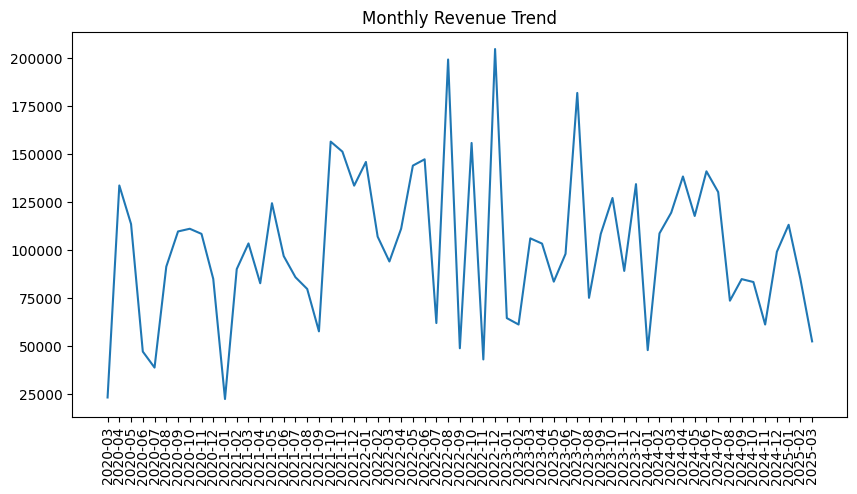

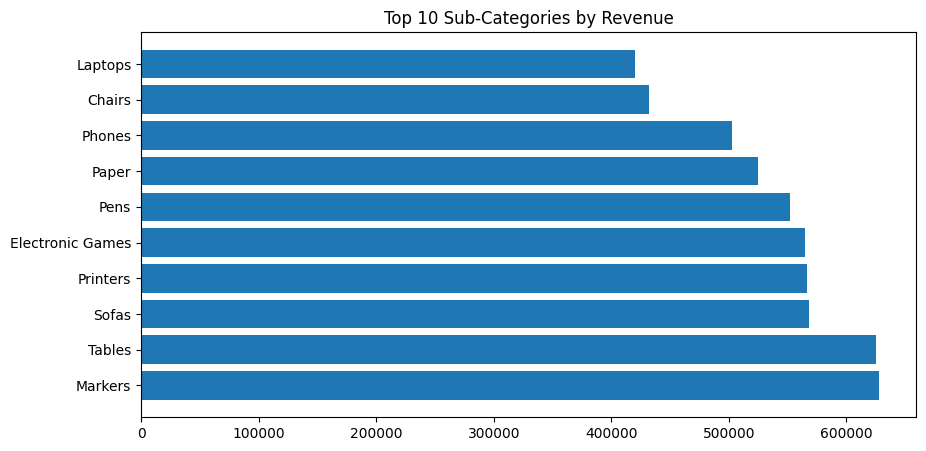

In [153]:
# Monthly Sales Trend
df['Month_Year'] = df['Order Date'].dt.to_period('M').astype(str)
monthly_trend = df.groupby('Month_Year')['Amount'].sum()
# print(monthly_trend)

plt.figure(figsize=(10, 5))
plt.plot(monthly_trend.index, monthly_trend.values)
plt.xticks(rotation=90)
plt.title('Monthly Revenue Trend')
plt.show()

# Top Sub-Categories
top_sub = df.groupby('Sub-Category')['Amount'].sum().nlargest(10)
plt.figure(figsize=(10, 5))
plt.barh(top_sub.index, top_sub.values)
plt.title('Top 10 Sub-Categories by Revenue')
plt.show()

---

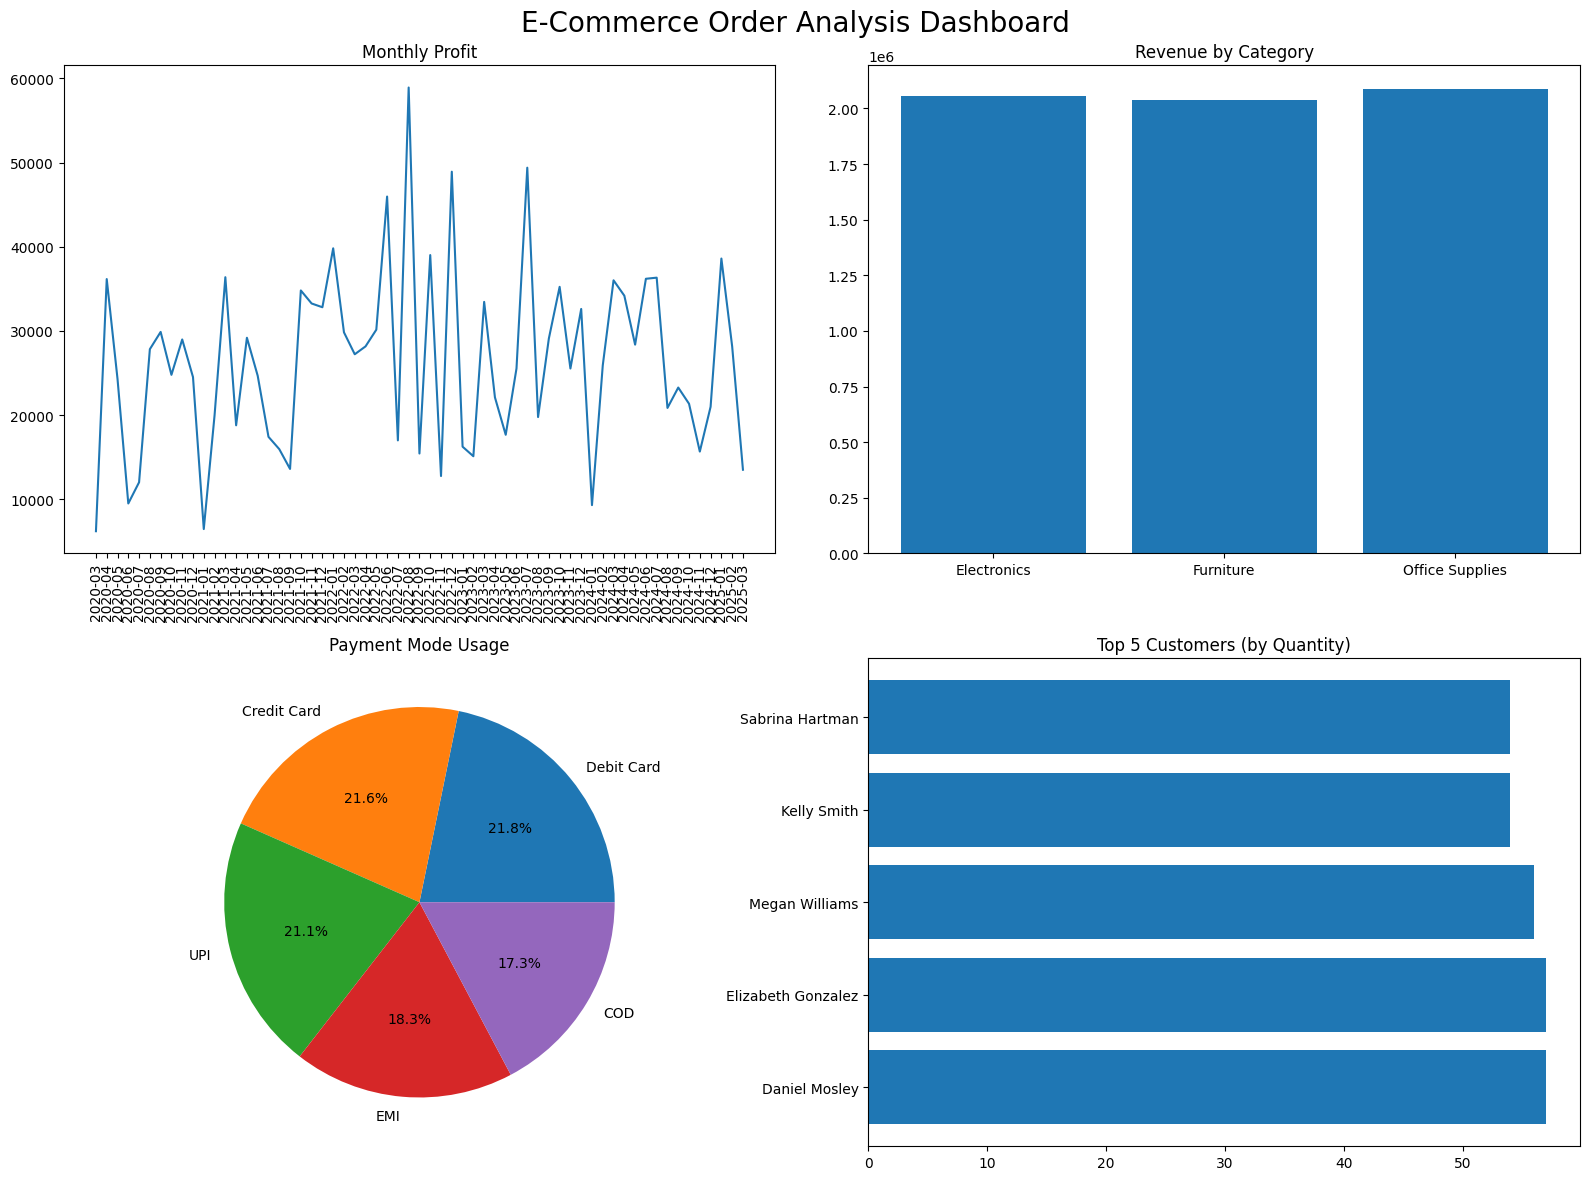

In [146]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('E-Commerce Order Analysis Dashboard', fontsize=20)

# 1. Monthly Profit Trend
monthly_profit = df.groupby('Month_Year')['Profit'].sum()
axes[0, 0].plot(monthly_profit.index, monthly_profit.values)
axes[0, 0].set_title('Monthly Profit')
axes[0, 0].tick_params(axis='x', rotation=90)

# 2. Amount by Category
cat_amt = df.groupby('Category')['Amount'].sum()
axes[0, 1].bar(cat_amt.index, cat_amt.values)
axes[0, 1].set_title('Revenue by Category')

# 3. Payment Mode Distribution
pay_dist = df['PaymentMode'].value_counts()
axes[1, 0].pie(pay_dist, labels=pay_dist.index, autopct='%1.1f%%')
axes[1, 0].set_title('Payment Mode Usage')

# 4. Top Customers
top_cust = df.groupby('CustomerName')['Quantity'].sum().nlargest(5)
axes[1, 1].barh(top_cust.index, top_cust.values)
axes[1, 1].set_title('Top 5 Customers (by Quantity)')

plt.tight_layout()
plt.show()